<a href="https://colab.research.google.com/github/bhuvan-j/Data-Science/blob/main/Covid_19_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

##Create Data for the positive samples

In [ ]:

FILE_PATH="/content/drive/MyDrive/Colab Notebooks/chestxray/metadata.csv"
IMAGES_PATH = "/content/drive/MyDrive/Colab Notebooks/chestxray/images"


In [ ]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [ ]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
TARGET_DIR = '/content/drive/MyDrive/Colab Notebooks/Dataset/Covid'
import os
import shutil
if not os.path.exists(TARGET_DIR):
  os.mkdir('/content/drive/MyDrive/Colab Notebooks/Dataset')
  os.mkdir('/content/drive/MyDrive/Colab Notebooks/Dataset/Covid')
  
  print("Covid folder created")

In [ ]:
cnt=0
for (i,row) in df.iterrows():
  if row["finding"]=='Pneumonia/Viral/COVID-19'  and row['view']=='PA':
    #we only want that xrays that are front view. PA stands for front view xrays
    filename= row['filename']
    image_path=os.path.join(IMAGES_PATH,filename)
    image_copy_path = os.path.join(TARGET_DIR,filename)
    shutil.copy2(image_path,image_copy_path)
    print("moving image ",cnt)
    cnt+=1

print(cnt)

moving image  0
moving image  1
moving image  2
moving image  3
moving image  4
moving image  5
moving image  6
moving image  7
moving image  8
moving image  9
moving image  10
moving image  11
moving image  12
moving image  13
moving image  14
moving image  15
moving image  16
moving image  17
moving image  18
moving image  19
moving image  20
moving image  21
moving image  22
moving image  23
moving image  24
moving image  25
moving image  26
moving image  27
moving image  28
moving image  29
moving image  30
moving image  31
moving image  32
moving image  33
moving image  34
moving image  35
moving image  36
moving image  37
moving image  38
moving image  39
moving image  40
moving image  41
moving image  42
moving image  43
moving image  44
moving image  45
moving image  46
moving image  47
moving image  48
moving image  49
moving image  50
moving image  51
moving image  52
moving image  53
moving image  54
moving image  55
moving image  56
moving image  57
moving image  58
moving 

##Sampling and extracting normal x-rays from the Kaggle Dataset

In [ ]:
import random
KAGGLE_FILE_PATH= "/content/drive/MyDrive/Colab Notebooks/chest_xray_kaggle/train/NORMAL"
TARGET_NORMAL_DIR = "/content/drive/MyDrive/Colab Notebooks/Dataset/Normal"


In [ ]:

image_names=os.listdir(KAGGLE_FILE_PATH)
random.shuffle(image_names)
os.mkdir(TARGET_NORMAL_DIR)
for i in range(196):
  image_name = image_names[i]
  image_path= os.path.join(KAGGLE_FILE_PATH,image_name)

  target_path = os.path.join(TARGET_NORMAL_DIR,image_name)

  shutil.copy2(image_path,target_path)
  print("copying image ",i)



copying image  0
copying image  1
copying image  2
copying image  3
copying image  4
copying image  5
copying image  6
copying image  7
copying image  8
copying image  9
copying image  10
copying image  11
copying image  12
copying image  13
copying image  14
copying image  15
copying image  16
copying image  17
copying image  18
copying image  19
copying image  20
copying image  21
copying image  22
copying image  23
copying image  24
copying image  25
copying image  26
copying image  27
copying image  28
copying image  29
copying image  30
copying image  31
copying image  32
copying image  33
copying image  34
copying image  35
copying image  36
copying image  37
copying image  38
copying image  39
copying image  40
copying image  41
copying image  42
copying image  43
copying image  44
copying image  45
copying image  46
copying image  47
copying image  48
copying image  49
copying image  50
copying image  51
copying image  52
copying image  53
copying image  54
copying image  55
co

In [ ]:
os.mkdir("/content/drive/MyDrive/Colab Notebooks/Dataset/Train")
os.mkdir("/content/drive/MyDrive/Colab Notebooks/Dataset/Test")

In [ ]:
196*0.75 #this is the split we will use for training. 75% training and 25% for validation.

147.0

In [ ]:
os.mkdir("/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Covid")
os.mkdir("/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Normal")

In [ ]:
COVID_PATH="/content/drive/MyDrive/Colab Notebooks/Dataset/Covid"
NORMAL_PATH="/content/drive/MyDrive/Colab Notebooks/Dataset/Normal"
T_COVID_PATH="/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Covid"
T_NORMAL_PATH="/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Normal"
covid_images= os.listdir(COVID_PATH)
normal_images=os.listdir(NORMAL_PATH)
for i in range(196-147):
  covid_image_path = os.path.join(COVID_PATH,covid_images[i])
  normal_image_path = os.path.join(NORMAL_PATH,normal_images[i])
  shutil.move(covid_image_path,T_COVID_PATH)
  shutil.move(normal_image_path,T_NORMAL_PATH)


In [ ]:
len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dataset/Test/Normal"))

49

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image


In [ ]:
#cnn based model in keras
model = Sequential()

In [ ]:
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [ ]:
#train from scratch
train_datagen = image.ImageDataGenerator(
    rescale= 1/255.0,
    shear_range= 0.2 ,
    zoom_range= 0.2,
    horizontal_flip=True
                                         )


test_dataset= image.ImageDataGenerator(rescale= 1.0/255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Dataset/Train',
    target_size=(224,224),
    batch_size=32,
    class_mode= 'binary'
)


Found 294 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator= test_dataset.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Dataset/Test',
    target_size=(224,224),
    batch_size=32,
    class_mode= 'binary'
)

Found 98 images belonging to 2 classes.


In [ ]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
hist = model.fit_generator(train_generator,steps_per_epoch=10,
                             epochs=20,
                             validation_data=validation_generator,
                             validation_steps=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
10/10 [==============================] - 68s 6s/step - loss: 0.9164 - accuracy: 0.6054 - val_loss: 0.6520 - val_accuracy: 0.8750
Epoch 2/20
10/10 [==============================] - 15s 2s/step - loss: 0.5156 - accuracy: 0.7619 - val_loss: 0.4850 - val_accuracy: 0.9062
Epoch 3/20
10/10 [==============================] - 15s 1s/step - loss: 0.3542 - accuracy: 0.8673 - val_loss: 0.2542 - val_accuracy: 0.9844
Epoch 4/20
10/10 [==============================] - 15s 2s/step - loss: 0.2911 - accuracy: 0.8946 - val_loss: 0.4649 - val_accuracy: 0.9844
Epoch 5/20
10/10 [==============================] - 15s 2s/step - loss: 0.2566 - accuracy: 0.9150 - val_loss: 0.1025 - val_accuracy: 0.9844
Epoch 6/20
10/10 [==============================] - 15s 1s/step - loss: 0.2319 - accuracy: 0.9082 - val_loss: 0.1433 - val_accuracy: 0.9688
Epoch 7/20
10/10 [==============================] - 15s 1s/step - loss: 0.2572 - accuracy: 0.9184 - val_loss: 0.1372 - val_accuracy: 0.9688
Epoch 8/20
10/10 [==

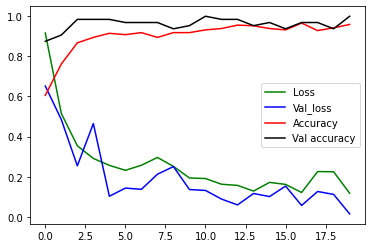

In [ ]:
plt.figure(0)
plt.plot(hist.history["loss"],'g',label="Loss")
plt.plot(hist.history["val_loss"] , 'b',label="Val_loss")
plt.plot(hist.history["accuracy"],'r',label="Accuracy")
plt.plot(hist.history["val_accuracy"],'black',label="Val accuracy")
plt.legend()
plt.show()


{'accuracy': [0.626086950302124,
  0.7956521511077881,
  0.852173924446106,
  0.921875,
  0.8999999761581421,
  0.8999999761581421,
  0.9347826242446899,
  0.9434782862663269,
  0.9347826242446899,
  0.9609375],
 'loss': [0.7391324043273926,
  0.48266375064849854,
  0.3411889672279358,
  0.27026528120040894,
  0.3295590281486511,
  0.29233112931251526,
  0.22504399716854095,
  0.1813996285200119,
  0.15912100672721863,
  0.12249691784381866],
 'val_accuracy': [0.765625,
  0.90625,
  0.921875,
  0.984375,
  0.78125,
  0.96875,
  0.953125,
  0.96875,
  1.0,
  1.0],
 'val_loss': [0.6595597267150879,
  0.37677574157714844,
  0.2050822228193283,
  0.08228810876607895,
  0.39470815658569336,
  0.14475050568580627,
  0.14892366528511047,
  0.06952134519815445,
  0.02554008737206459,
  0.03876662626862526]}